<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/KID0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-7ab185874513>:81: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_filename)


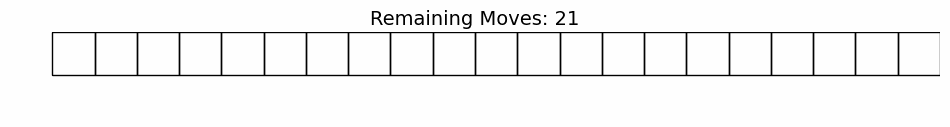

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

def nim_game(n):
    dp = [False] * (n + 1)
    for i in range(1, n + 1):
        if i - 1 >= 0 and not dp[i - 1]:
            dp[i] = True
        elif i - 2 >= 0 and not dp[i - 2]:
            dp[i] = True
    return dp

def play_game(n, first_player):
    current_sticks = n
    moves = []
    while current_sticks > 0:
        if first_player:
            if current_sticks - 1 >= 0 and not dp[current_sticks - 1]:
                move = 1
            else:
                move = 2
        else:
            if current_sticks - 2 >= 0 and not dp[current_sticks - 2]:
                move = 2
            else:
                move = 1
        moves.append((first_player, move))
        current_sticks -= move
        first_player = not first_player
    return moves

def create_frame(frame, n, moves, completed_moves):
    fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size
    ax.set_xlim(-1, n)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')

    # Draw squares
    for i in range(n):
        square = plt.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='none')
        ax.add_patch(square)

    # Color squares based on moves
    for idx in range(frame):
        player, move = completed_moves[idx]
        color = 'red' if player else 'green'  # Red for A, Green for B

        for j in range(move):
            square_x = sum(m[1] for m in completed_moves[:idx]) + j
            ax.add_patch(plt.Rectangle((square_x, 0), 1, 1, edgecolor='black', facecolor=color))
            ax.text(square_x + 0.5, 0.5, 'A' if player else 'B', ha='center', va='center', fontsize=12, color='white')

    ax.set_title(f"Remaining Moves: {n - sum(m[1] for m in completed_moves[:frame])}", fontsize=14)
    ax.axis('off')  # Turn off axes

    # Save the frame
    frame_filename = f'frame_{frame}.png'
    plt.savefig(frame_filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    return frame_filename

# Total number of sticks
n = 21
dp = nim_game(n)

# Generate moves
moves = play_game(n, True)  # A starts first
completed_moves = []  # Record each step

# Record each step's actions
for i, (player, move) in enumerate(moves):
    completed_moves.append((player, move))

# Create GIF
gif_filename = 'nim_game.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1.0) as writer:  # 1 second per frame
    for frame in range(len(completed_moves) + 1):
        frame_filename = create_frame(frame, n, moves, completed_moves)
        image = imageio.imread(frame_filename)
        writer.append_data(image)

# Delete temporary frame files
for frame in range(len(completed_moves)):
    os.remove(f'frame_{frame}.png')

# Display GIF
from IPython.display import Image
Image(filename=gif_filename)

最后取走棒子的玩家，判定为输。

<ipython-input-2-08b72d7fb0d3>:111: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_filename)


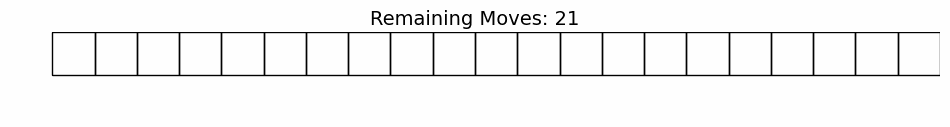

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import random

def nim_game(n):
    dp = [False] * (n + 1)
    for i in range(1, n + 1):
        if i - 1 >= 0 and not dp[i - 1]:
            dp[i] = True
        elif i - 2 >= 0 and not dp[i - 2]:
            dp[i] = True
    return dp

def optimal_move(n):
    # Player A's optimal strategy based on the remaining sticks
    if n == 1:
        return 1  #
    elif n == 2:
        return 1  # Take 1 stick and win
    elif n == 3:
        return 2  # Take 2 sticks and win
    elif n == 4:
        return random.choice([1, 2])  # Random, hoping B makes a mistake
    elif n == 5:
        return 1  # Take 1 stick and win (Leave 4 sticks for B)
    elif n == 6:
        return 2  # Take 2 sticks and win (Leave 4 sticks for B)
    elif n == 7:
        return random.choice([1, 2])  # Random, hoping B makes a mistake
    elif n == 8:
        return 1  # Take 1 stick and win (Leave 7 sticks for B)
    elif n == 9:
        return 2  # Take 2 stick and win (Leave 7 sticks for B)
    elif n == 10:
        return random.choice([1, 2])  # Random, hoping B makes a mistake
    else:
        # For n > 4, continue to apply the optimal strategy
        if (n - 5) % 3 == 0:
            return 1  # Leave a multiple of 4 for B
        elif (n - 6) % 3 == 0:
            return 2  # Leave a multiple of 4 for B
        else:
            return random.choice([1, 2])  # Random

def random_move(n):
    return random.choice([1, 2]) if n > 1 else 1  # If only 1 stick remains, take it

def play_game(n, first_player):
    current_sticks = n
    moves = []
    while current_sticks > 0:
        if first_player:  # Player A's turn
            move = optimal_move(current_sticks)
        else:  # Player B's turn
            move = random_move(current_sticks)

        moves.append((first_player, move))
        current_sticks -= move
        first_player = not first_player
    return moves

def create_frame(frame, n, moves, completed_moves):
    fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size
    ax.set_xlim(-1, n)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')

    # Draw squares
    for i in range(n):
        square = plt.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='none')
        ax.add_patch(square)

    # Color squares based on moves
    for idx in range(frame):
        player, move = completed_moves[idx]
        color = 'red' if player else 'green'  # Red for A, Green for B

        for j in range(move):
            square_x = sum(m[1] for m in completed_moves[:idx]) + j
            ax.add_patch(plt.Rectangle((square_x, 0), 1, 1, edgecolor='black', facecolor=color))
            ax.text(square_x + 0.5, 0.5, 'A' if player else 'B', ha='center', va='center', fontsize=12, color='white')

    ax.set_title(f"Remaining Moves: {n - sum(m[1] for m in completed_moves[:frame])}", fontsize=14)
    ax.axis('off')  # Turn off axes

    # Save the frame
    frame_filename = f'frame_{frame}.png'
    plt.savefig(frame_filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    return frame_filename

# Total number of sticks
n = 21
dp = nim_game(n)

# Generate moves
moves = play_game(n, True)  # A starts first
completed_moves = []  # Record each step

# Record each step's actions
for i, (player, move) in enumerate(moves):
    completed_moves.append((player, move))

# Create GIF
gif_filename = 'nim_game.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1.0) as writer:  # 1 second per frame
    for frame in range(len(completed_moves) + 1):
        frame_filename = create_frame(frame, n, moves, completed_moves)
        image = imageio.imread(frame_filename)
        writer.append_data(image)

# Delete temporary frame files
for frame in range(len(completed_moves)):
    os.remove(f'frame_{frame}.png')

# Display GIF
from IPython.display import Image
Image(filename=gif_filename)

最后取走棒子的玩家，判定为赢。

<ipython-input-3-9969973c3b78>:88: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_filename)


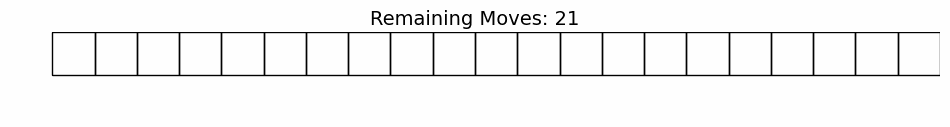

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import random

def optimal_move(n):
    # Player A's optimal strategy based on the remaining sticks
    if n == 1:
        return 1  # Take the last stick and win
    elif n == 2:
        return 2  # Take both sticks and win
    elif n == 3:
        return 1  # Take 1 stick, hoping B makes a mistake
    elif n == 4:
        return 1  # Leave 3 sticks for B
    else:
        # For n > 4, continue to apply the optimal strategy
        # Leave the opponent with 1, 2, or 3 sticks depending on their moves
        if (n - 1) % 4 == 0:
            return 1  # Leave a multiple of 4 for B
        else:
            return (n - 1) % 4  # Take enough to leave a multiple of 4 for B

def random_move(n):
    return random.choice([1, 2]) if n > 1 else 1  # If only 1 stick remains, take it

def play_game(n, first_player):
    current_sticks = n
    moves = []
    while current_sticks > 0:
        if first_player:  # Player A's turn
            move = optimal_move(current_sticks)
        else:  # Player B's turn
            move = random_move(current_sticks)

        moves.append((first_player, move))
        current_sticks -= move
        first_player = not first_player
    return moves

def create_frame(frame, n, moves, completed_moves):
    fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size
    ax.set_xlim(-1, n)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')

    # Draw squares
    for i in range(n):
        square = plt.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='none')
        ax.add_patch(square)

    # Color squares based on moves
    for idx in range(frame):
        player, move = completed_moves[idx]
        color = 'red' if player else 'green'  # Red for A, Green for B

        for j in range(move):
            square_x = sum(m[1] for m in completed_moves[:idx]) + j
            ax.add_patch(plt.Rectangle((square_x, 0), 1, 1, edgecolor='black', facecolor=color))
            ax.text(square_x + 0.5, 0.5, 'A' if player else 'B', ha='center', va='center', fontsize=12, color='white')

    ax.set_title(f"Remaining Moves: {n - sum(m[1] for m in completed_moves[:frame])}", fontsize=14)
    ax.axis('off')  # Turn off axes

    # Save the frame
    frame_filename = f'frame_{frame}.png'
    plt.savefig(frame_filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    return frame_filename

# Total number of sticks
n = 21

# Generate moves
moves = play_game(n, True)  # A starts first
completed_moves = []  # Record each step

# Record each step's actions
for i, (player, move) in enumerate(moves):
    completed_moves.append((player, move))

# Create GIF
gif_filename = 'nim_game.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1.0) as writer:  # 1 second per frame
    for frame in range(len(completed_moves) + 1):
        frame_filename = create_frame(frame, n, moves, completed_moves)
        image = imageio.imread(frame_filename)
        writer.append_data(image)

# Delete temporary frame files
for frame in range(len(completed_moves)):
    os.remove(f'frame_{frame}.png')

# Display GIF
from IPython.display import Image
Image(filename=gif_filename)

# 最后一个拿走为输


Remaining sticks: 21
Player A takes 2 stick(s).

Remaining sticks: 19
Player B, enter the number of sticks to take (1 or 2): 2
Player B takes 2 stick(s).

Remaining sticks: 17
Player A takes 1 stick(s).

Remaining sticks: 16
Player B, enter the number of sticks to take (1 or 2): 1
Player B takes 1 stick(s).

Remaining sticks: 15
Player A takes 2 stick(s).

Remaining sticks: 13
Player B, enter the number of sticks to take (1 or 2): 2
Player B takes 2 stick(s).

Remaining sticks: 11
Player A takes 1 stick(s).

Remaining sticks: 10
Player B, enter the number of sticks to take (1 or 2): 1
Player B takes 1 stick(s).

Remaining sticks: 9
Player A takes 2 stick(s).

Remaining sticks: 7
Player B, enter the number of sticks to take (1 or 2): 2
Player B takes 2 stick(s).

Remaining sticks: 5
Player A takes 1 stick(s).

Remaining sticks: 4
Player B, enter the number of sticks to take (1 or 2): 1
Player B takes 1 stick(s).

Remaining sticks: 3
Player A takes 2 stick(s).

Remaining sticks: 1
Playe

<ipython-input-4-aa7daa77b2e2>:111: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_filename)


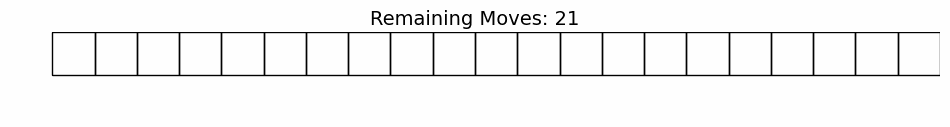

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import random

def optimal_move(n):
    # Player A's optimal strategy based on the remaining sticks
    if n == 1:
        return 1  #
    elif n == 2:
        return 1  # Take 1 stick and win
    elif n == 3:
        return 2  # Take 2 sticks and win
    elif n == 4:
        return random.choice([1, 2])  # Random, hoping B makes a mistake
    elif n == 5:
        return 1  # Take 1 stick and win (Leave 4 sticks for B)
    elif n == 6:
        return 2  # Take 2 sticks and win (Leave 4 sticks for B)
    elif n == 7:
        return random.choice([1, 2])  # Random, hoping B makes a mistake
    elif n == 8:
        return 1  # Take 1 stick and win (Leave 7 sticks for B)
    elif n == 9:
        return 2  # Take 2 stick and win (Leave 7 sticks for B)
    elif n == 10:
        return random.choice([1, 2])  # Random, hoping B makes a mistake
    else:
        # For n > 4, continue to apply the optimal strategy
        if (n - 5) % 3 == 0:
            return 1  # Leave a multiple of 4 for B
        elif (n - 6) % 3 == 0:
            return 2  # Leave a multiple of 4 for B
        else:
            return random.choice([1, 2])  # Random

def player_b_move(n):
    while True:
        try:
            move = int(input(f"Player B, enter the number of sticks to take (1 or 2): "))
            if move in [1, 2] and move <= n:
                return move
            else:
                print("Invalid input. Please enter 1 or 2.")
        except ValueError:
            print("Invalid input. Please enter a number.")

def play_game(n):
    current_sticks = n
    moves = []
    first_player = True  # A starts first

    while current_sticks > 0:
        print(f"\nRemaining sticks: {current_sticks}")  # Print remaining sticks
        if first_player:  # Player A's turn
            move = optimal_move(current_sticks)
            print(f"Player A takes {move} stick(s).")
        else:  # Player B's turn
            move = player_b_move(current_sticks)
            print(f"Player B takes {move} stick(s).")

        moves.append((first_player, move))
        current_sticks -= move
        first_player = not first_player

    return moves

def create_frame(frame, n, moves, completed_moves):
    fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size
    ax.set_xlim(-1, n)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')

    # Draw squares
    for i in range(n):
        square = plt.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='none')
        ax.add_patch(square)

    # Color squares based on moves
    for idx in range(frame):
        player, move = completed_moves[idx]
        color = 'red' if player else 'green'  # Red for A, Green for B

        for j in range(move):
            square_x = sum(m[1] for m in completed_moves[:idx]) + j
            ax.add_patch(plt.Rectangle((square_x, 0), 1, 1, edgecolor='black', facecolor=color))
            ax.text(square_x + 0.5, 0.5, 'A' if player else 'B', ha='center', va='center', fontsize=12, color='white')

    ax.set_title(f"Remaining Moves: {n - sum(m[1] for m in completed_moves[:frame])}", fontsize=14)
    ax.axis('off')  # Turn off axes

    # Save the frame
    frame_filename = f'frame_{frame}.png'
    plt.savefig(frame_filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    return frame_filename

# Total number of sticks
n = 21

# Generate moves
moves = play_game(n)  # Start game
completed_moves = moves  # Record each step for the GIF

# Create GIF
gif_filename = 'nim_game.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1.0) as writer:  # 1 second per frame
    for frame in range(len(completed_moves) + 1):
        frame_filename = create_frame(frame, n, moves, completed_moves)
        image = imageio.imread(frame_filename)
        writer.append_data(image)

# Delete temporary frame files
for frame in range(len(completed_moves)):
    os.remove(f'frame_{frame}.png')

# Display GIF
from IPython.display import Image
Image(filename=gif_filename)

# 最后一个拿走为赢


Remaining sticks: 21
Player A takes 2 stick(s).

Remaining sticks: 19
Player B, enter the number of sticks to take (1 or 2): 1
Player B takes 1 stick(s).

Remaining sticks: 18
Player A takes 2 stick(s).

Remaining sticks: 16
Player B, enter the number of sticks to take (1 or 2): 1
Player B takes 1 stick(s).

Remaining sticks: 15
Player A takes 1 stick(s).

Remaining sticks: 14
Player B, enter the number of sticks to take (1 or 2): 2
Player B takes 2 stick(s).

Remaining sticks: 12
Player A takes 2 stick(s).

Remaining sticks: 10
Player B, enter the number of sticks to take (1 or 2): 1
Player B takes 1 stick(s).

Remaining sticks: 9
Player A takes 2 stick(s).

Remaining sticks: 7
Player B, enter the number of sticks to take (1 or 2): 1
Player B takes 1 stick(s).

Remaining sticks: 6
Player A takes 1 stick(s).

Remaining sticks: 5
Player B, enter the number of sticks to take (1 or 2): 2
Player B takes 2 stick(s).

Remaining sticks: 3
Player A takes 1 stick(s).

Remaining sticks: 2
Playe

<ipython-input-5-f8ef9060a139>:102: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame_filename)


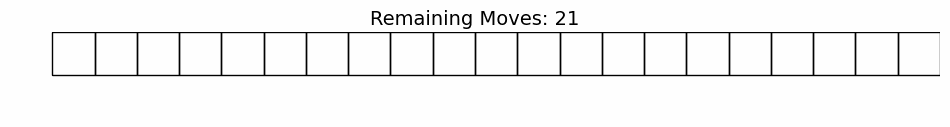

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import random


def optimal_move(n):
    # Player A's optimal strategy based on the remaining sticks
    if n == 1:
        return 1  # Take 1 stick and win
    elif n == 2:
        return 2  # Take 2 sticks and win
    elif n == 3:
        return random.choice([1, 2])  # Random, hoping B makes a mistake
    elif n == 4:
        return 1  # Take 1 stick and leave 3 sticks for B
    elif n == 5:
        return 2  # Take 2 stick and leave 3 sticks for B
    else:
        # For n > 3, continue to apply the optimal strategy
        if (n - 1) % 3 == 0:
            return 1  # Leave a multiple of 3 for B
        elif (n - 2) % 3 == 0:
            return 2  # Leave a multiple of 3 for B
        else:
            return random.choice([1, 2])  # Random, hoping B makes a mistake

def player_b_move(n):
    while True:
        try:
            move = int(input(f"Player B, enter the number of sticks to take (1 or 2): "))
            if move in [1, 2] and move <= n:
                return move
            else:
                print("Invalid input. Please enter 1 or 2.")
        except ValueError:
            print("Invalid input. Please enter a number.")

def play_game(n):
    current_sticks = n
    moves = []
    first_player = True  # A starts first

    while current_sticks > 0:
        print(f"\nRemaining sticks: {current_sticks}")  # Print remaining sticks
        if first_player:  # Player A's turn
            move = optimal_move(current_sticks)
            print(f"Player A takes {move} stick(s).")
        else:  # Player B's turn
            move = player_b_move(current_sticks)
            print(f"Player B takes {move} stick(s).")

        moves.append((first_player, move))
        current_sticks -= move
        first_player = not first_player

    return moves

def create_frame(frame, n, moves, completed_moves):
    fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size
    ax.set_xlim(-1, n)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')

    # Draw squares
    for i in range(n):
        square = plt.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='none')
        ax.add_patch(square)

    # Color squares based on moves
    for idx in range(frame):
        player, move = completed_moves[idx]
        color = 'red' if player else 'green'  # Red for A, Green for B

        for j in range(move):
            square_x = sum(m[1] for m in completed_moves[:idx]) + j
            ax.add_patch(plt.Rectangle((square_x, 0), 1, 1, edgecolor='black', facecolor=color))
            ax.text(square_x + 0.5, 0.5, 'A' if player else 'B', ha='center', va='center', fontsize=12, color='white')

    ax.set_title(f"Remaining Moves: {n - sum(m[1] for m in completed_moves[:frame])}", fontsize=14)
    ax.axis('off')  # Turn off axes

    # Save the frame
    frame_filename = f'frame_{frame}.png'
    plt.savefig(frame_filename, bbox_inches='tight', pad_inches=0.1)
    plt.close(fig)
    return frame_filename

# Total number of sticks
n = 21

# Generate moves
moves = play_game(n)  # Start game
completed_moves = moves  # Record each step for the GIF

# Create GIF
gif_filename = 'nim_game.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1.0) as writer:  # 1 second per frame
    for frame in range(len(completed_moves) + 1):
        frame_filename = create_frame(frame, n, moves, completed_moves)
        image = imageio.imread(frame_filename)
        writer.append_data(image)

# Delete temporary frame files
for frame in range(len(completed_moves)):
    os.remove(f'frame_{frame}.png')

# Display GIF
from IPython.display import Image
Image(filename=gif_filename)